NIJMI BAJRACHARYA GROUP:11 ID:2508912

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time


In [7]:
#problem:1
datas = pd.read_csv("/content/drive/MyDrive/Concept & technology of AI/diabetes.csv")
datas.head()#it is used to display 1st five rows

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
datas.info()#dataset info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [10]:
datas.describe()#gives summary

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [12]:
datas.isnull().sum()#check missing values

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [15]:
columns_with_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
datas[columns_with_zero] = datas[columns_with_zero].replace(0, np.nan)#used to replace 0 with NaN inselected columns
for col in columns_with_zero:
    datas[col].fillna(datas[col].mean(), inplace=True)#verifying
datas.isnull().sum()

/tmp/ipython-input-2891999164.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  datas[col].fillna(datas[col].mean(), inplace=True)#verifying


,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [19]:
X = datas.drop(columns=['Outcome']).values
y = datas['Outcome'].values
def train_test_split_scratch(X, y, test_size=0.3, random_seed=42):
    np.random.seed(random_seed)
    indices = np.arange(len(X))
    np.random.shuffle(indices)

    test_size_count = int(len(X) * test_size)
    test_indices = indices[:test_size_count]
    train_indices = indices[test_size_count:]

    return X[train_indices], X[test_indices], y[train_indices], y[test_indices]

X_train, X_test, y_train, y_test = train_test_split_scratch(X, y)

X_train.shape, X_test.shape

((538, 8), (230, 8))

In [20]:
def euclidean_distance(p1, p2):
    if p1.shape != p2.shape:
        raise ValueError("Dimension mismatch")
    return np.sqrt(np.sum((p1 - p2) ** 2))

In [21]:
def knn_predict_single(query, X_train, y_train, k=3):
    distances = [euclidean_distance(query, x) for x in X_train]
    nearest_indices = np.argsort(distances)[:k]
    nearest_labels = y_train[nearest_indices]
    return np.bincount(nearest_labels).argmax()


In [22]:
def knn_predict(X_test, X_train, y_train, k=3):
    return np.array([knn_predict_single(x, X_train, y_train, k) for x in X_test])


In [24]:
def compute_accuracy(y_true, y_pred):
    return (np.sum(y_true == y_pred) / len(y_true)) * 100

predictions = knn_predict(X_test, X_train, y_train, k=3)
accuracy = compute_accuracy(y_test, predictions)
print(f"Accuracy: {accuracy:.2f}%")

Accuracy: 70.00%


In [26]:
#problem:2
def min_max_scaling(X):
    return (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
X_scaled = min_max_scaling(X)
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split_scratch(X_scaled, y)
pred_scaled = knn_predict(X_test_s, X_train_s, y_train_s, k=3)
acc_scaled = compute_accuracy(y_test_s, pred_scaled)

print(f"Accuracy : {acc_scaled:.2f}%")



Accuracy : 71.30%


In [27]:
#problem:3
k_values = range(1, 16)
acc_original = []
acc_scaled = []
time_original = []
time_scaled = []
for k in k_values:
    start = time.time()
    pred = knn_predict(X_test, X_train, y_train, k)
    time_original.append(time.time() - start)
    acc_original.append(compute_accuracy(y_test, pred))

    start = time.time()
    pred_s = knn_predict(X_test_s, X_train_s, y_train_s, k)
    time_scaled.append(time.time() - start)
    acc_scaled.append(compute_accuracy(y_test_s, pred_s))


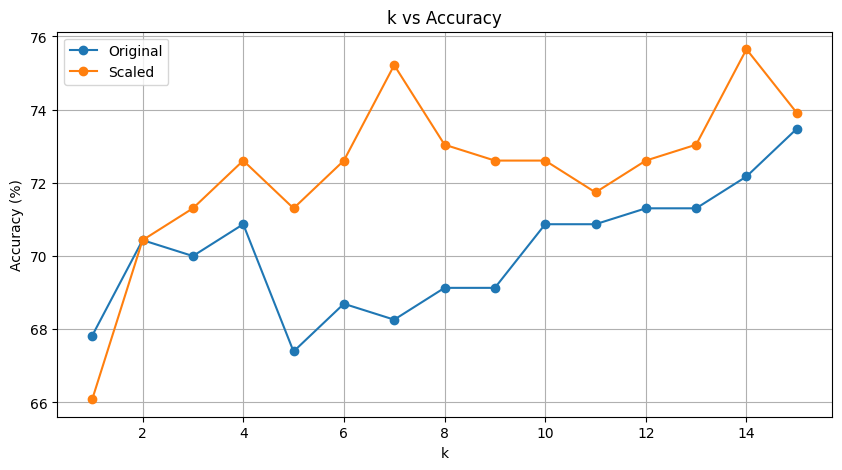

In [28]:
plt.figure(figsize=(10,5))
plt.plot(k_values, acc_original, marker='o', label='Original')
plt.plot(k_values, acc_scaled, marker='o', label='Scaled')
plt.xlabel("k")
plt.ylabel("Accuracy (%)")
plt.title("k vs Accuracy")
plt.legend()
plt.grid(True)
plt.show()


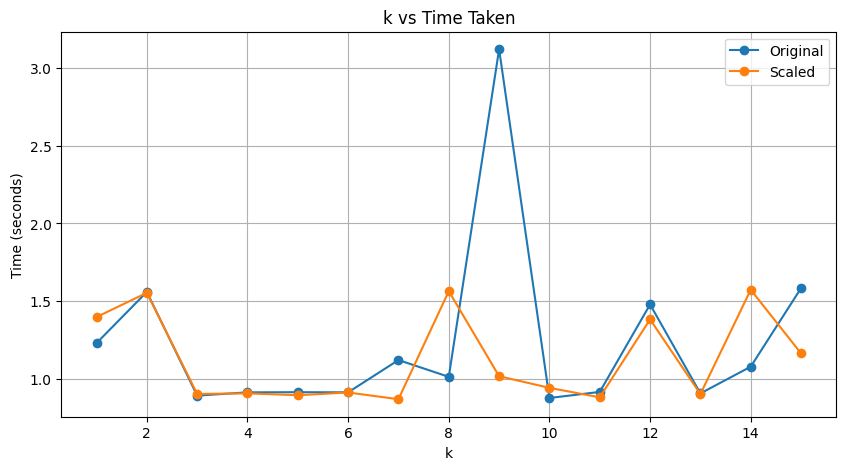

In [29]:
plt.figure(figsize=(10,5))
plt.plot(k_values, time_original, marker='o', label='Original')
plt.plot(k_values, time_scaled, marker='o', label='Scaled')
plt.xlabel("k")
plt.ylabel("Time (seconds)")
plt.title("k vs Time Taken")
plt.legend()
plt.grid(True)
plt.show()
